In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection
from time import time
from itertools import zip_longest

In [9]:
n_neighbors = 30

In [31]:
def load_mnist():
    
    digits = load_digits(n_class=6)
    X, y = digits.data, digits.target
    n_samples, n_features = X.shape
    return X, y, digits

In [32]:
def plot_digits(X):
    
    # plots the first 100 digits (nrows*ncols)
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
    for idx, ax in enumerate(axs.ravel()):
        ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
        ax.axis('off')
    _ = fig.suptitle('A selection from the 64-dimensional digits dataset', fontsize=16)

In [37]:
def plot_embedding(X, y, title, ax, digits):
    X = MinMaxScaler().fit_transform(X)

    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        ax.text(
            X[i, 0],
            X[i, 1],
            str(y[i]),
            color = plt.cm.Dark2(y[i]),
            fontdict = {'weight': 'bold', 'size': 9},
        )

        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis('off')

In [34]:
def create_embeddings():
    
    embeddings = {
        'Random projection embedding': SparseRandomProjection(
            n_components = 2, random_state = 42
        ),
        'Truncated SVD embedding': TruncatedSVD(n_components = 2),
        'Linear Discriminant Analysis embedding': LinearDiscriminantAnalysis(
            n_components = 2
        ),
        'Isomap embedding': Isomap(n_neighbors = n_neighbors, n_components = 2),
        'Standard LLE embedding': LocallyLinearEmbedding(
            n_neighbors = n_neighbors, n_components = 2, method = 'standard'
        ),
        't-SNE embeedding': TSNE(
            n_components = 2, init = 'pca', learning_rate = 'auto', random_state = 0
        ),
    }
    
    return embeddings

In [35]:
def create_projections(embeddings, X, y):
    
    projections, timing = {}, {}
    for name, transformer in embeddings.items():
        if name.startswith('Linear Discriminant Analysis'):
            data = X.copy()
            data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
        else:
            data = X

        print(f'Computing {name}...')
        start_time = time()
        projections[name] = transformer.fit_transform(data, y)
        timing[name] = time() - start_time

    return projections, timing

In [41]:
def plot_projections(projections, timing, y, digits):
    
    fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (17, 24))

    for name, ax in zip_longest(timing, axs.ravel()):
        if name is None:
            ax.axis('off')
            continue
        title = f'{name} (time {timing[name]:.3f}s)'
        plot_embedding(projections[name], y, title, ax, digits)

    plt.show()

In [42]:
def main():
    
    X, y, digits = load_mnist()
    plot_digits(X)
    
    embeddings = create_embeddings()
    projections, timing = create_projections(embeddings, X, y)
    plot_projections(projections, timing, y, digits)

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing t-SNE embeedding...


/home/sahoo009/anaconda3/envs/interview_prep/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


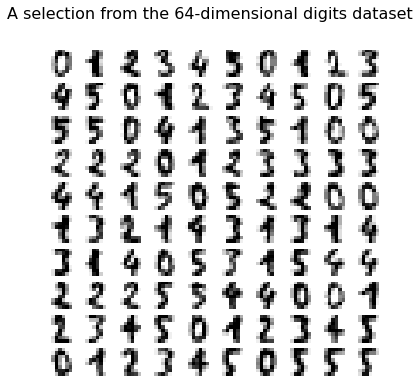

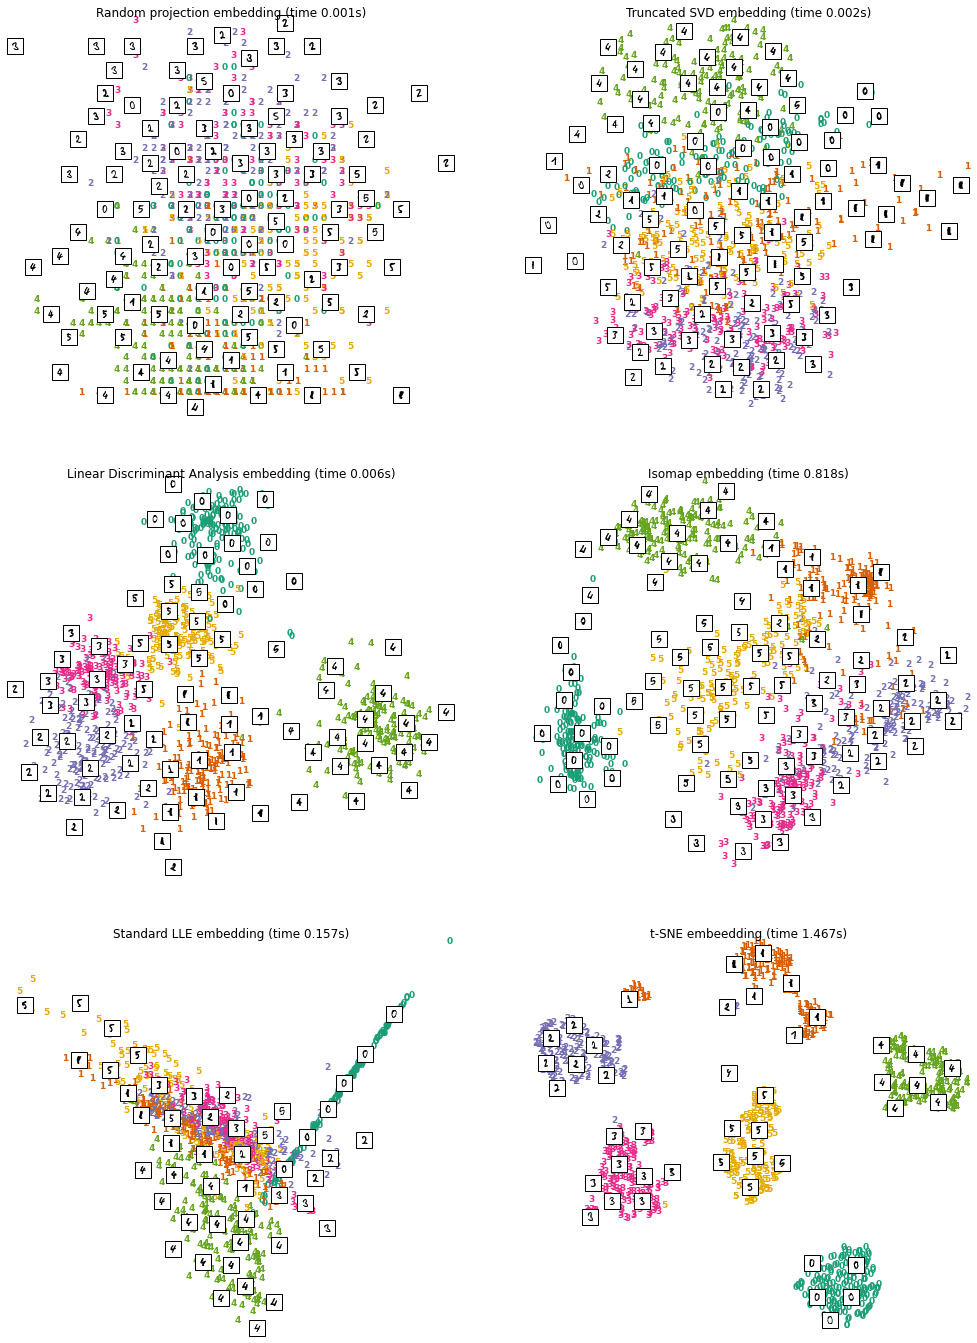

In [43]:
if __name__ == '__main__':
    main()